# Reconocimiento de patrones: Identificación de grupos o Clustering
### Ramón Soto C. [(rsotoc@moviquest.com)](mailto:rsotoc@moviquest.com/)
![ ](images/blank.png)
![agents](images/binary_data_under_a_magnifying.jpg)
[ver en nbviewer](http://nbviewer.ipython.org/github/rsotoc/pattern-recognition/blob/master/Clustering%20II.ipynb)

## Técnicas de clustering: Dendrogramas

El primer problema a resolver en un problema de clustering es determinar el número adecuado de clusters. En la imagen siguiente, parece razonable proponer 3 o 4 clusters.

![ ](images/Dendro1.png)

Sin embargo, cuando los datos son más complejos, por ejemplo, si el espacio de características es de más de 2 dimensiones, visualizar los posibles clusters es sumamente difícil. Incluso en casos 2-D, puede ser difícil, aún con agrupamientos aparentemente evidentes. En la imagen siguiente, por ejemplo, mostramos otras opciones de agrupamiento de los mismos datos en la gráfica anterior:

![ ](images/Dendro1b.png)

El dendrograma es una representación gráfica del agrupamiento jerárquico de un grupo de vectores de características. En el agrupamiento jerárquico, su busca generar una jerarquía de clusters en la que los elementos se agrupan de acuerdo a sus semejanzas. El nivel de semejanza exigido determina la cantidad y conformación de los clusters. En la imagen siguiente se presentan 12 objetos que deben ser clasificados. Los elementos están organizados de acuerdo con su distancia y unidos por un '*arco*' que representa la distancia a la que se encuentran entre si; por ejemplo, los elementos 4 y 6 están separados una distancia de 1, la distancia mínima entre los elementos 1, 2 y 5 es también de 1, al igual que entre los elementos 7, 8 y 9. La distancia más pequeña del elemento 3 a alguno de los otros 11 elementos es de 4 (su distancia a al menos uno de los elementos 1, 2 y 5). La distancia más pequeña del elemento 11 es de 2 a alguno de los elementos 7, 8 y 10, mientras que la distancia más pequeña del elemento 12 es de 7 a alguno de los elementos 7, 8, 10 y 11. El elemento más cercano a 9 es alguno de los elementos 7, 8, 10, 11 y 12, mientras que su distancia más pequeña a alguno de los elementos 1, 2, 3, 4, 5 y 6 es de 11.

![ ](images/Dendro2.png)

Entonces, si exigimos que todos los elementos de un cluster estén a lo más a una distancia de 1 de alguno de los otros miembros del cluster, entonces tenemos 7 clusters {C1={4, 6}, C2={1, 2, 5}, C3={3}, C4={7, 8, 10}, C5={11}, C6={12}, C7={9}}. Por otra parte, si permitimos distancias de 2, entonces los clusters 4 y 5 se integran en un sólo cluster, dejando sólo 6 clusters {C1={4, 6}, C2={1, 2, 5}, C3={3}, C4.5={7, 8, 10, 11}, C6={12}, C7={9}}. Si permitimos distancias de 4, los clusters 2 y 3 se integran y así sucesivamente hasta que, al permitir distancias de hasta 10 sólo quedarían 2 clusters {C1.2.3={4, 6, 1, 2, 5, 3}, C4.5.6.7={7, 8, 10, 11, 12, 9}}. Si permitimos distancias de 11 o más, entonces todos los elementos están en un cluster.

Consideremos un conjunto de datos formado por los primeros 10 elementos de nuestros datos de diabetes, limpiados con imputación media (sobre el total de los datos).

In [1]:
import numpy as np
import pandas as pd
import os

os.chdir('Data sets/Pima Indian Data Set')

In [2]:
df = pd.read_csv("pima-indians-diabetes.data", 
                 names = ['emb', 'gl2h', 'pad', 'ept', 'is2h', 'imc', 'fpd', 'edad', 'class'])
df.loc[df['pad'] == 0,'pad'] = df['pad'].mean()
df.loc[df['ept'] == 0,'ept'] = df['ept'].mean()
df.loc[df['is2h'] == 0,'is2h'] = df['is2h'].mean()
df.loc[df['imc'] == 0,'imc'] = df['imc'].mean()

X = df.head(10)

print(X)

   emb  gl2h        pad        ept        is2h        imc    fpd  edad  class
0    6   148  72.000000  35.000000   79.799479  33.600000  0.627    50      1
1    1    85  66.000000  29.000000   79.799479  26.600000  0.351    31      0
2    8   183  64.000000  20.536458   79.799479  23.300000  0.672    32      1
3    1    89  66.000000  23.000000   94.000000  28.100000  0.167    21      0
4    0   137  40.000000  35.000000  168.000000  43.100000  2.288    33      1
5    5   116  74.000000  20.536458   79.799479  25.600000  0.201    30      0
6    3    78  50.000000  32.000000   88.000000  31.000000  0.248    26      1
7   10   115  69.105469  20.536458   79.799479  35.300000  0.134    29      0
8    2   197  70.000000  45.000000  543.000000  30.500000  0.158    53      1
9    8   125  96.000000  20.536458   79.799479  31.992578  0.232    54      1


En este momento hay 10 clusters (uno por elemento): {C0={0}, C1={1}, C2={2}, C3={3}, C4={4}, C5={5}, C6=6}, C7={7}, C8={8}, C9={9}}.

La matriz de distancias euclidianas es:

In [3]:
from scipy.spatial import distance
np.set_printoptions(precision=1, suppress=True) # Cortar la impresión de decimales a 1

md = distance.squareform(distance.pdist(X, 'euclidean')) # Convertir el vector de distancias a una matriz cuadrada
print(md)

[[   0.    66.9   44.    69.    96.7   41.3   77.8   42.   465.9   36.6]
 [  66.9    0.    98.7   18.9  107.1   33.4   20.8   33.8  477.4   56.4]
 [  44.    98.7    0.    96.1  105.5   67.9  107.4   69.3  464.7   70.3]
 [  69.    18.9   96.1    0.    94.7   33.2   23.1   33.   463.5   59.6]
 [  96.7  107.1  105.5   94.7    0.    99.7  101.    97.5  381.8  109.1]
 [  41.3   33.4   67.9   33.2   99.7    0.    47.6   12.   471.5   34.5]
 [  77.8   20.8  107.4   23.1  101.    47.6    0.    44.8  471.7   73. ]
 [  42.    33.8   69.3   33.    97.5   12.    44.8    0.   471.7   38.3]
 [ 465.9  477.4  464.7  463.5  381.8  471.5  471.7  471.7    0.   470.2]
 [  36.6   56.4   70.3   59.6  109.1   34.5   73.    38.3  470.2    0. ]]


O para más claridad:

![ ](images/Dendro3.png)

La construcción del dendrograma sigue el siguiente procedimiento iterativo:

* Podemos observar que (ignorando los ceros que son las distancias de un elemento a sí mismo), la distancia más pequeña entre todos los elementos es **12**, entre los elementos 5 y 7. Juntamos estos dos elementos en un nuevo cluster C5.7={5,7} y lo agregamos al conjunto de clusters, mientras que eliminamos los clusters 5 y 7.

![ ](images/Dendro4a.png)

* Ahora debemos calcular las distancias de cada uno de los vectores restantes al cluster C5.7. Para ello hay diversas formas de hacerlo, la más simple es seleccionando la menor distancia del vector a cada uno de los objetos dentro de C5.7.

![ ](images/Dendro4b.png)

* La siguiente distancia más pequeña es **18.9** entre los elementos 1 y 3. Entonces creamos un nuevo cluster C1.3.


* La siguiente distancia más pequeña es **20.8** entre los elementos 1 y 6, pero 1 ya esá en el cluster C1.3, es decir, en realidad 20.8 es la distancia del vector 6 al cluster C1.3. Entonces creamos un nuevo cluster C1.3.6 = {{1,3},6}. Por el momento (o a una distancia de 20.8), los cluster son {C0={0}, C1.3.6={{1,3},6}, C2={2}, C4={4}, C5.7={5,7}, C8={8}, C9={9}}.


* La siguiente distancia más pequeña es *23.1* entre los elementos 3 y 6 que ya están integrados en el cluster C1.3.6. No hacemos nada. 


* La siguiente distancia más pequeña es **33** entre los elementos 3 y 7. Ambos elementos están en clusters integrados, entonces creamos un nuevo cluster C1.3.6.5.7={{{1,3},6},{5,7}}. La nueva jerarquía de clusters es: {C0={0}, C1.3.6.5.7={{{1,3},6},{5,7}}, C2={2}, C4={4}, C8={8}, C9={9}}.


* Las distancias *33.2* y *33.8* no agregan nuevas modificaciones. 


* La siguiente distancia más pequeña es **34.5** entre el elemento 9 y el cluster C1.3.6.5.7. Extendemos el agrupamiento a C1.3.6.5.7.9 = {{{{1,3},6},{5,7}},9}.


* La siguiente distancia más pequeña es **36.6**, entre el elemento 0 y el cluster C1.3.6.5.7.9. Extendmeos este agrupamiento y ahora la jerarquía de clusters es: {C1.3.6.5.7.9.0 = {{{{{1,3},6},{5,7}},9},0}, C2={2}, C4={4}, C8={8}}.


* Las siguientes distancias (*38.3*, *41.3* y *42*) no agregan modificaciones.


* La siguiente distancia más pequeña es **44** entre el elemento 2 y el cluster C1.3.6.5.7.9.0, que ahora se extiende a C1.3.6.5.7.9.0.2


* Las siguientes distancias (*44.8, 47.6, 56.4, 59.6, 66.9, 67.9, 69, 69.3, 70.3, 73 y 77.8*) no agregan modificaciones.



* La siguiente distancia más pequeña es **94.7** entre el elemento 4 y el cluster C1.3.6.5.7.9.0.2, que ahora se extiende a C1.3.6.5.7.9.0.2.4.


* Las siguientes distancias (*96.1, 96.7, 97.5, 98.7, 99.7, 101, 105.5, 107.1, 107.4, 109.1*) no agregan modificaciones.


* La siguiente distancia más pequeña es **381.8** entre el elemento 8 y el cluster C1.3.6.5.7.9.0.2.4. 


* Las siguientes distancias ya no agregarán modificaciones. De manera que la jerarquía de clusters queda como: {C1.3.6.5.7.9.0.2.4.8 = {{{{{{{{1,3},6},{5,7}},9},0},2},4},8}}.

A continuación, podemos comparar estos resultados con los obenidos mediante los métodos del paquete [scipy.cluster.hierarchy](http://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html).

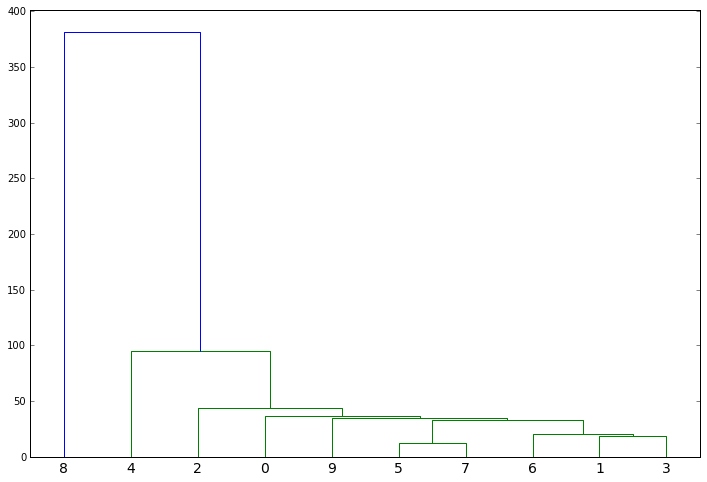

In [4]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline

Z = linkage(X, 'single')
plt.figure(figsize=(12, 8))
dendrogram(Z, leaf_font_size=14)
plt.show()

En el código previo el método [*linkage*](http://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage) es quien hace las agrupaciones por distancia. Existen diversos métodos, siendo *single* el más simple. 

Otras opciones son:

* '*complete*' que obliga a que el nuevo vector sea "cercano" a todos los elementos en el cluster, por lo que se toma en cuenta para la agrupación la distancia máxima del vector a los elementos del cluster:

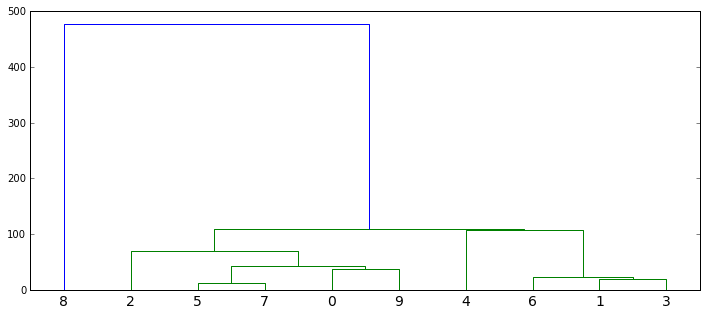

In [5]:
Z = linkage(X, 'complete')
plt.figure(figsize=(12, 5))
dendrogram(Z, leaf_font_size=14)
plt.show()

* '*centroid*': el nuevo vector sea "cercano" al "*prototipo*" de los elementos en el cluster, por lo que se toma en cuenta para la agrupación la distancia del vector al centroide de los elementos en el cluster:

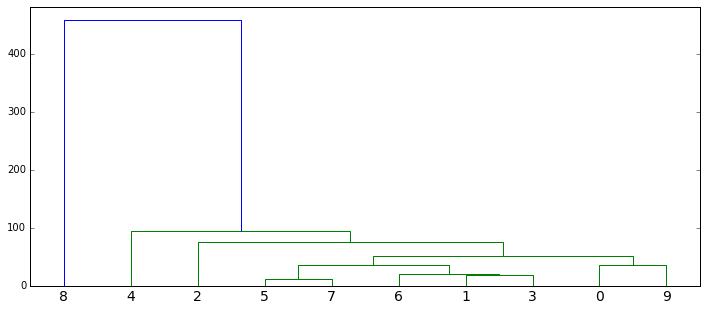

In [6]:
Z = linkage(X, 'centroid')
plt.figure(figsize=(12, 5))
dendrogram(Z, leaf_font_size=14)
plt.show()

Los dendrogramas son útiles en etapas exploratorias, principalmente para determinar los grupos presentes en una muestra. Dado su caracter gráfico, es difícil emplearlos cuando se tienen muchos datos. A continuación se presenta el el dendrograma para los 768 datos del problema de diabetes:

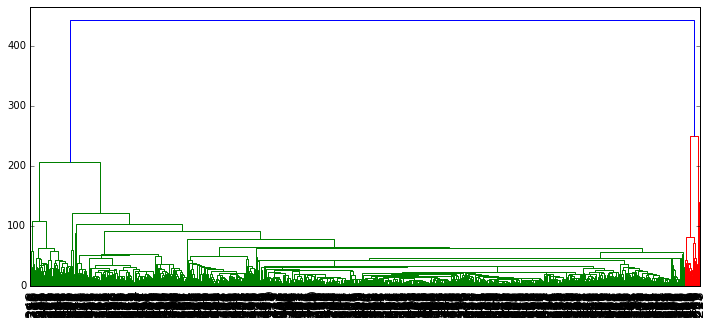

In [7]:
Z = linkage(df, 'centroid')
plt.figure(figsize=(12, 5))
dendrogram(Z, leaf_font_size=14)
plt.show()

Por supuesto, con 768 datos no es viable analizar la gráfica completa. En su lugar *truncaremos* el dendrograma para ver sólo los últimos agrupamientos:

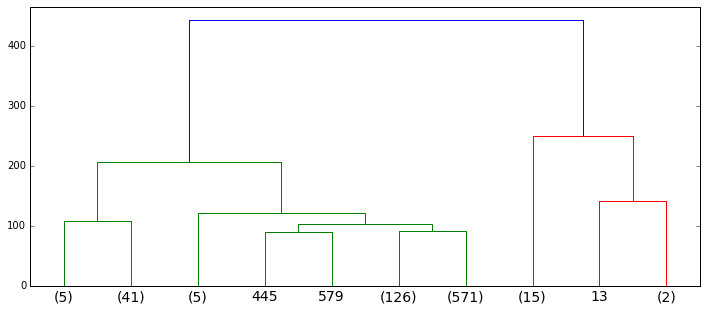

In [8]:
plt.figure(figsize=(12, 5))
dendrogram(
    Z,
    truncate_mode='lastp',  # mostrar sólo los últims p clusters
    p=10,                   
    show_leaf_counts=True,  # mostrar entre paréntesis el número de elementos en cada cluster
    leaf_font_size=14.,
)
plt.show()

Aunque es posible automatizar la definición del número de clusters en el conjunto de datos, en muchos casos es preferible realizar la tarea manualmente. En este caso, parece natural pensar en 2 o 4 grupos.

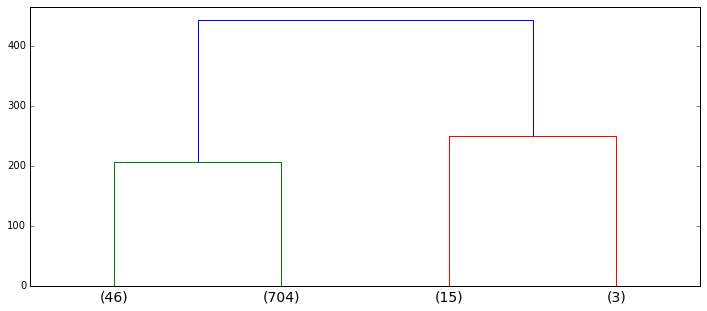

In [10]:
plt.figure(figsize=(12, 5))
dendrogram(Z, truncate_mode='lastp', p=4, show_leaf_counts=True, leaf_font_size=14.)
plt.show()

<hr style="border-width: 3px;">

### Tarea 4

* Obtenga los datos del ejemplo de [sobrevivientes del Titanic](https://www.kaggle.com/c/titanic); elimine las columnas no numéricas y realice un análisis mediante dendrogramas de los datos. 

**Fecha de entrega**: Martes 21 de febrero.